[![Open in Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/fat-forensics/resources/master?filepath=tabular_surrogate_builder%2Ftabular_surrogate_builder.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fat-forensics/resources/blob/master/tabular_surrogate_builder/tabular_surrogate_builder.ipynb)
[![new BSD](https://img.shields.io/github/license/fat-forensics/resources.svg)](https://github.com/fat-forensics/resources/blob/master/LICENCE)

# Building Tabular Surrogates With an Interactive Widget #

This directory contains a Jupyter Notebook that was used as a hands-on exercise
during the following events:

* [2021 BIAS Summer School][2021_bias-summer-school]; and
* [2021 TAILOR Summer School][2021_tailor-summer-school].

To run the notebook (`tabular_surrogate_builder.ipynb`) you need to install a
collection of Python dependencies listed in the `requirements.txt` file
(included in this directory) by executing `pip install -r requirements.txt`.
Alternatively, you can run it via Binder or Colab by clicking the buttons
included above.

[2021_tailor-summer-school]: https://events.fat-forensics.org/2021_tailor-summer-school/
[2021_bias-summer-school]: https://events.fat-forensics.org/2021_bias/

In [1]:
#@title Install dependencies
# NBVAL_IGNORE_OUTPUT
import os
if 'google.colab' in str(get_ipython()):
    LIBRARY_URL = ('https://raw.githubusercontent.com/fat-forensics/resources/'
                   'master/tabular_surrogate_builder/{}')

    require = 'requirements.txt'
    require_url = LIBRARY_URL.format(require)
    if not os.path.exists(require):
        ! wget $require_url -O $require
        ! pip install -r $require

    module = 'tabular_surrogate_builder.py'
    module_url = LIBRARY_URL.format(module)
    if not os.path.exists(module):
        ! wget $module_url -O $module

In [2]:
#@title Set up other dependencies
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

import tabular_surrogate_builder

In [3]:
#@title Get iris data set and fit "black boxes"
RANDOM_SEED = 42

iris = datasets.load_iris()

x_name, y_name = 'petal length (cm)', 'petal width (cm)'
x_ind = iris.feature_names.index(x_name)
y_ind = iris.feature_names.index(y_name)

X = iris.data[:, [x_ind, y_ind]]  # we only take the first two features.
Y = iris.target

tree_clf = DecisionTreeClassifier(
    max_depth=5, min_samples_leaf=15, random_state=RANDOM_SEED)
tree_clf.fit(X, Y)

logreg_clf = LogisticRegression(random_state=RANDOM_SEED)
logreg_clf.fit(X, Y)

LogisticRegression(random_state=42)

In [4]:
#@title Widget specification
black_boxes = {
    'tree': tree_clf.predict,
    'logistic regression': logreg_clf.predict
}
feature_spec = {
    0: {
        'name': x_name,
        'range': (X[:, 0].min(), X[:, 0].max()),
        'instance': {
            'value': 1.5,
            'step': .01
        },
        'discretisation': {
            'init': (2.5, 5),
            'range': (1, 7),
            'step': .5
        }
    },
    1: {
        'name': y_name,
        'range': (X[:, 1].min(), X[:, 1].max()),
        'instance': {
            'value': .25,
            'step': .01
        },
        'discretisation': {
            'init': (1, 1.5),
            'range': (0, 2.5),
            'step': .5
        }
    }
}
class_map = {
    '{} ({})'.format(cls, clr): i
    for i, (cls, clr) in
    enumerate(zip(iris.target_names, ['red', 'yellow', 'blue']))
}

In [5]:
#@title Generate widget
# NBVAL_IGNORE_OUTPUT
explainer_widget = tabular_surrogate_builder.generate_tabular_widget(
    black_boxes, class_map, feature_spec, RANDOM_SEED)

## Interactive Surrogate Builder ##

In [6]:
#@title Display widget
# NBVAL_IGNORE_OUTPUT
explainer_widget

## Reference Materials ##

The figure below illustrates the discretisation and binarisation steps required to construct an interpretable representation of *tabular data*.
The accompanying equation outlines the analytical solution for a *linear* surrogate (ordinary least squares) of a binary interpretable representation with two features.

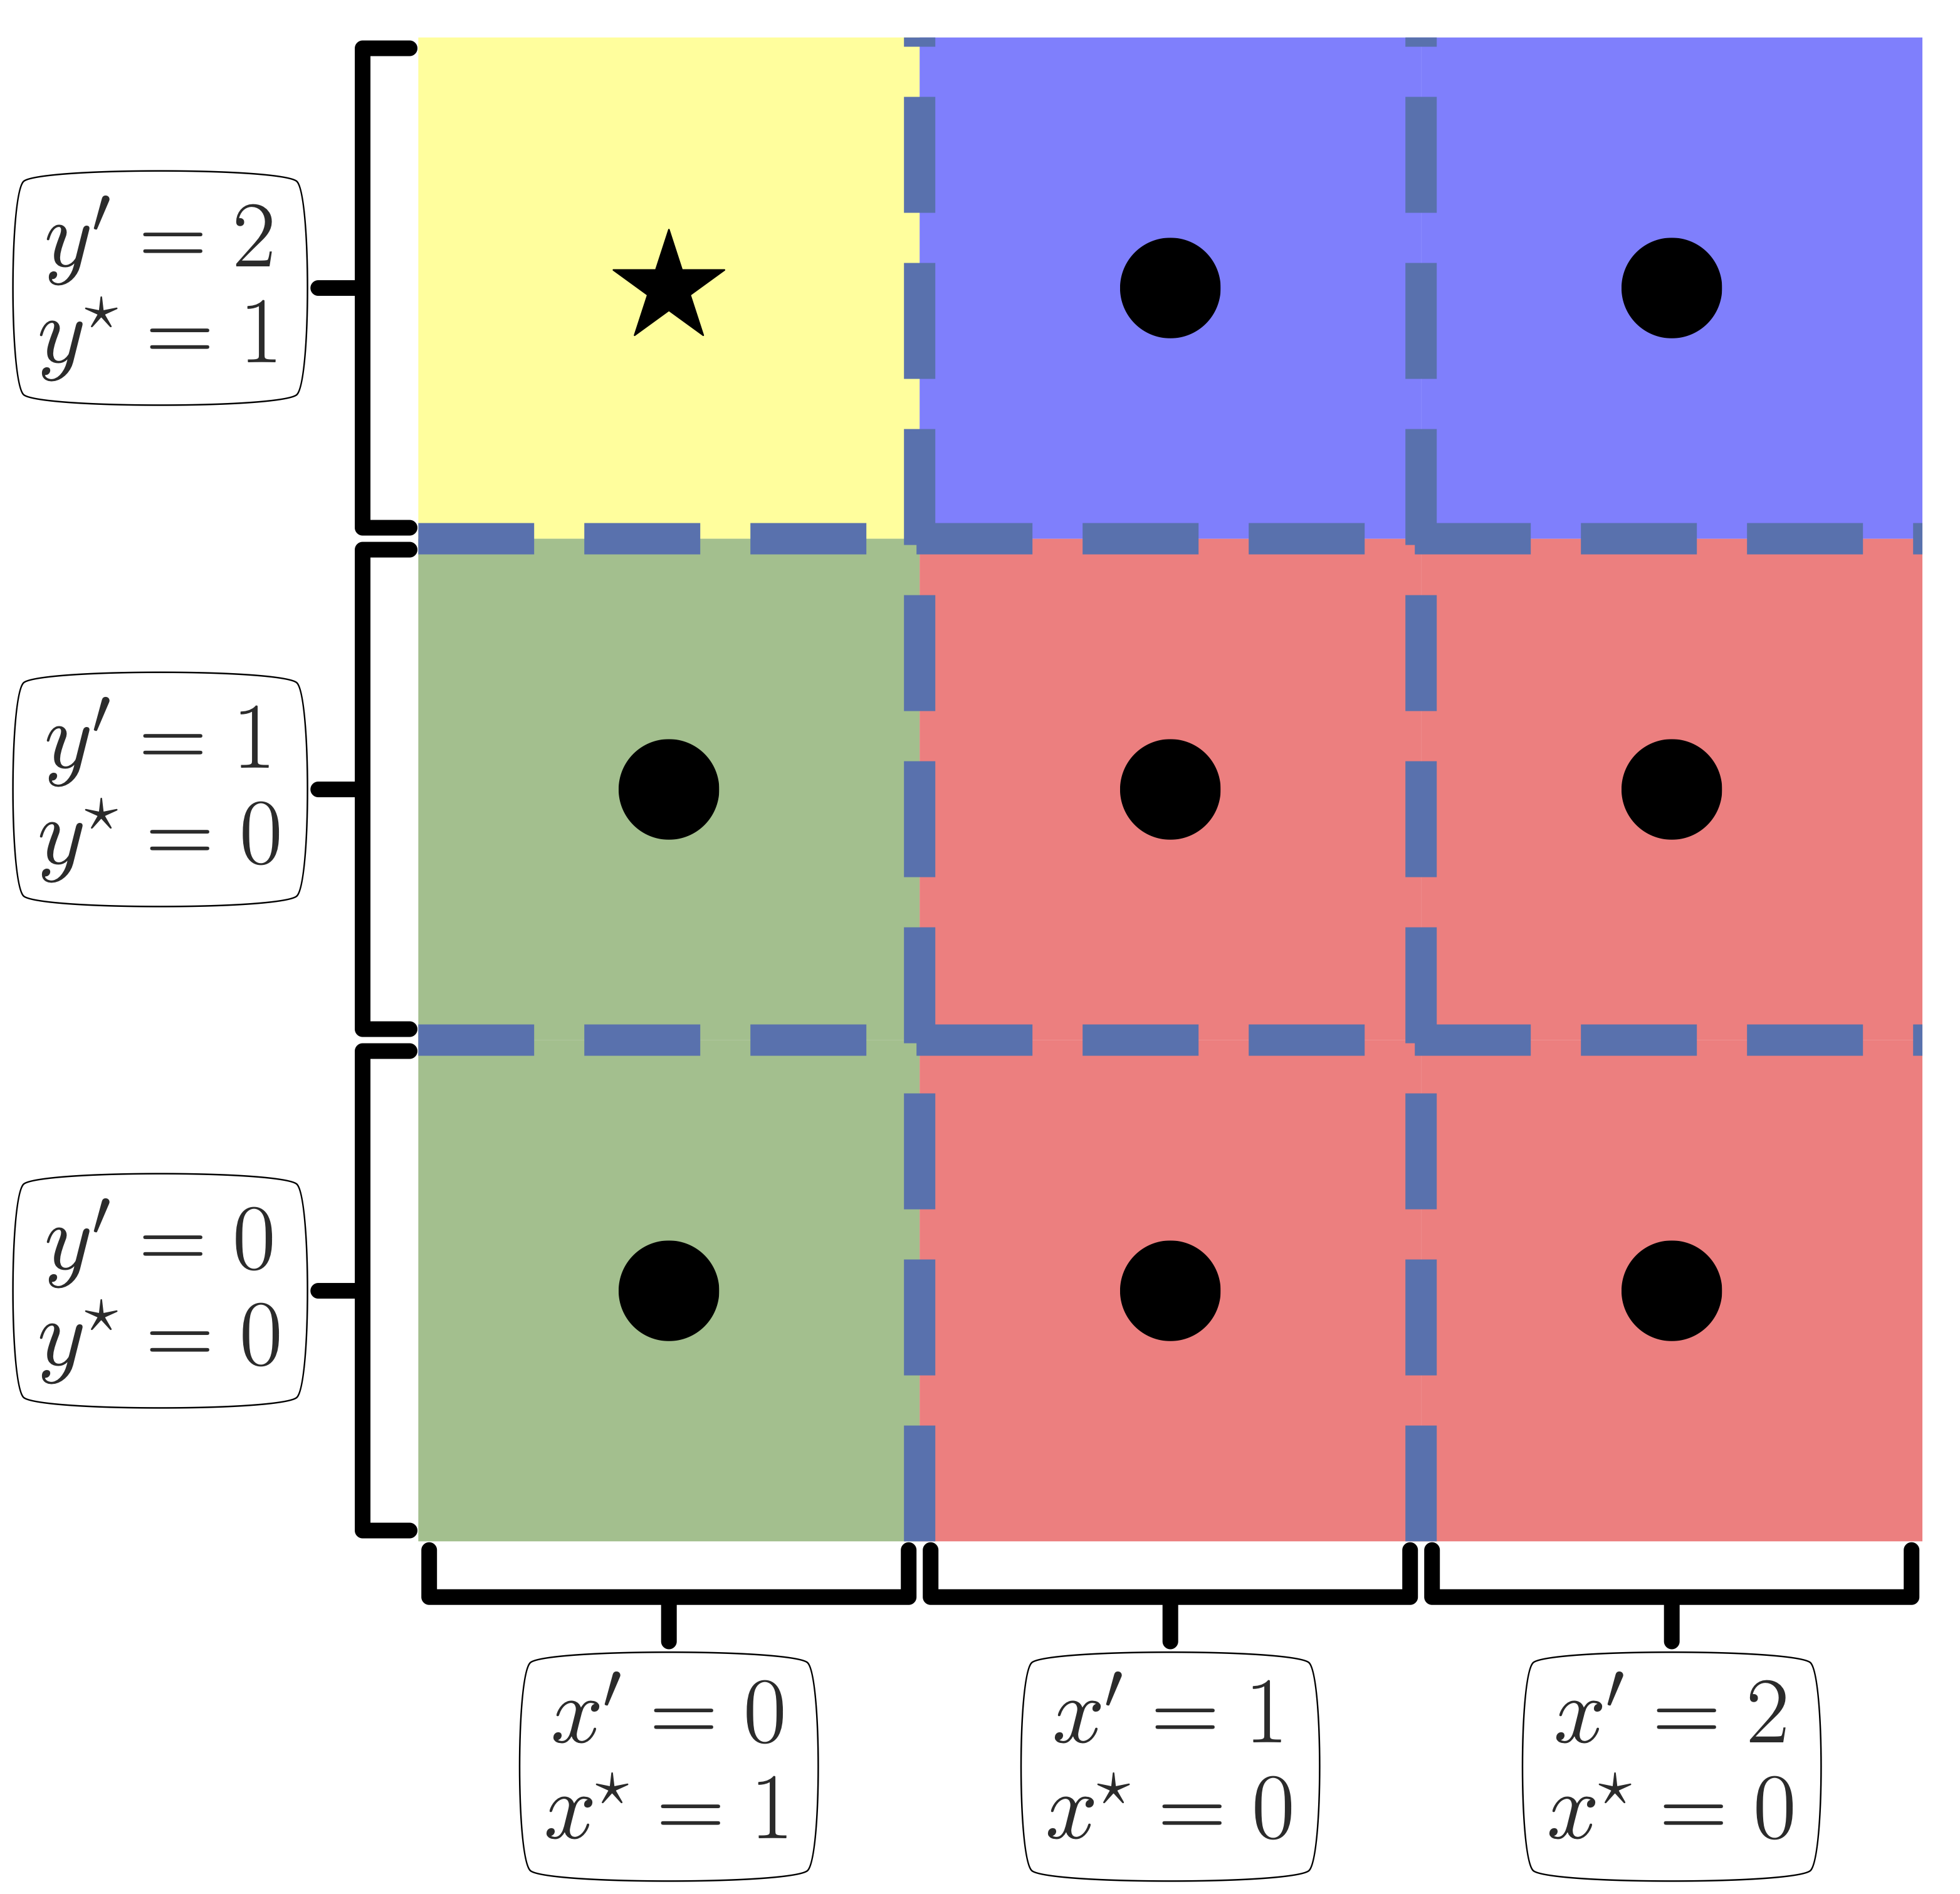

<br />

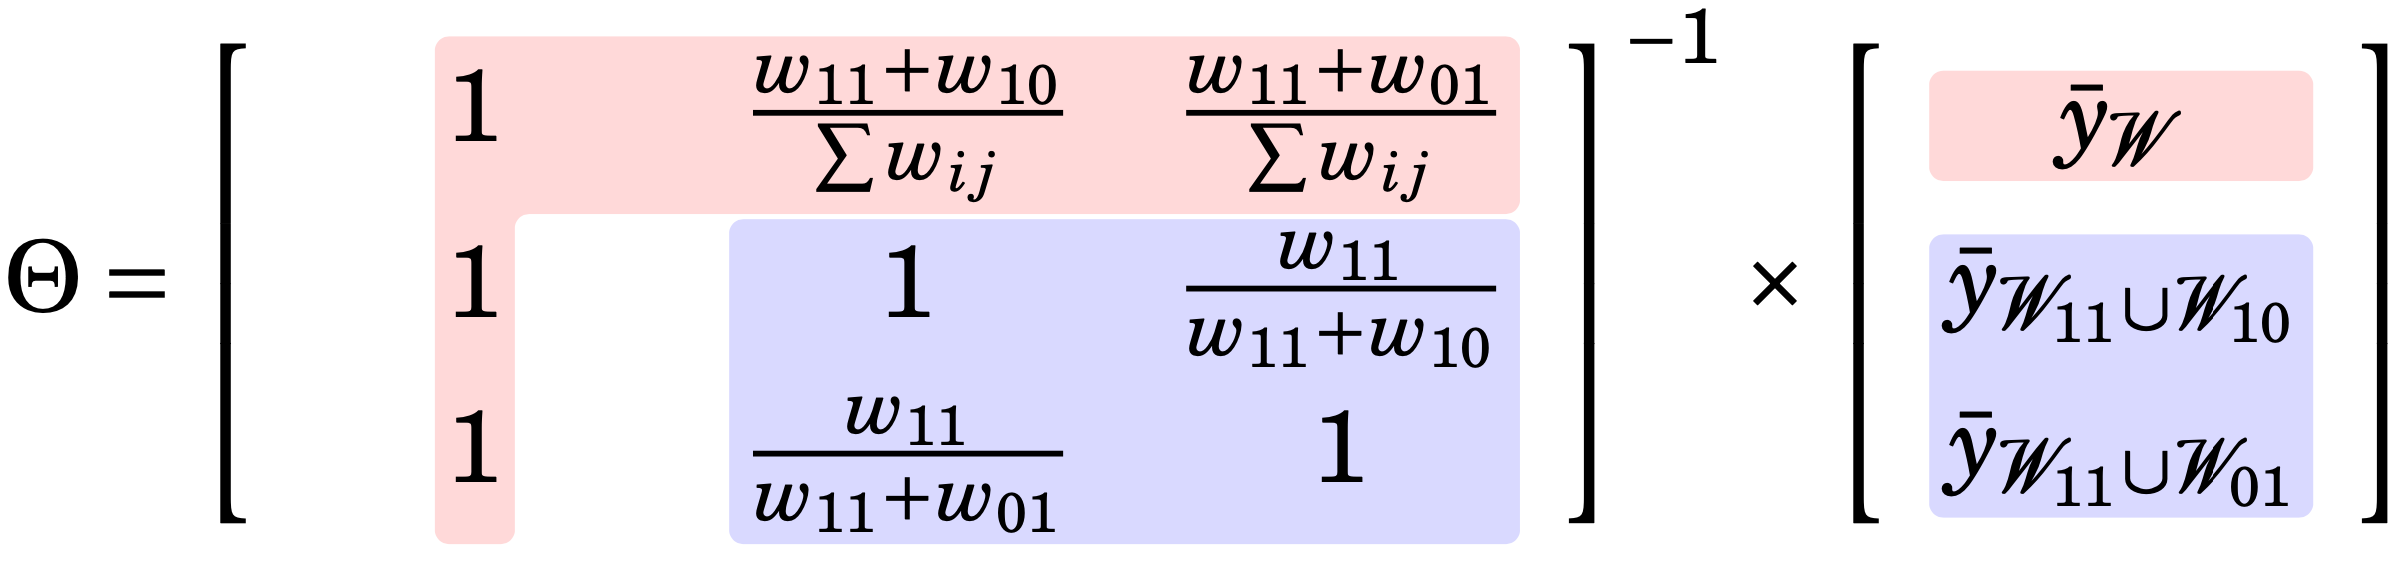